<a href="https://colab.research.google.com/github/Reem-Aboutaleb/ReemAboutaleb-Data-Science-Bootcamp/blob/main/Week3_Data_Visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Week 3 – Exploratory Data Analysis & Data Visualization
**Dataset:** Brooklyn Bridge Automated Pedestrian Counts Demonstration Project  
**Name:** Reem Aboutaleb  
**Course:** NYU Tandon Career Hub – Data Science Bootcamp (Fall 2025)




In [9]:
import pandas as pd

df = pd.read_csv("/content/Brooklyn_Bridge_Automated_Pedestrian_Counts_Demonstration_Project.csv")

print("Column names in your dataset:")
print(df.columns.tolist())
df.head()



Column names in your dataset:
['hour_beginning', 'location', 'Pedestrians', 'Towards Manhattan', 'Towards Brooklyn', 'weather_summary', 'temperature', 'precipitation', 'lat', 'long', 'events', 'Location1']


,hour_beginning,location,Pedestrians,Towards Manhattan,Towards Brooklyn,weather_summary,temperature,precipitation,lat,long,events,Location1
0,04/30/2019 12:00:00 AM,Brooklyn Bridge,3,3,0,NaN,NaN,NaN,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)"
1,12/31/2019 10:00:00 PM,Brooklyn Bridge,10,9,1,cloudy,42.0,0.0005,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)"
2,12/31/2019 11:00:00 PM,Brooklyn Bridge,2,0,2,cloudy,42.0,0.0004,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)"
3,12/31/2019 09:00:00 PM,Brooklyn Bridge,12,0,12,cloudy,42.0,0.0036,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)"
4,04/01/2019 03:00:00 AM,Brooklyn Bridge,1,0,1,clear-night,36.0,0.0000,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)"


Q1 — Weekdays (Mon–Fri) line plot of pedestrian counts


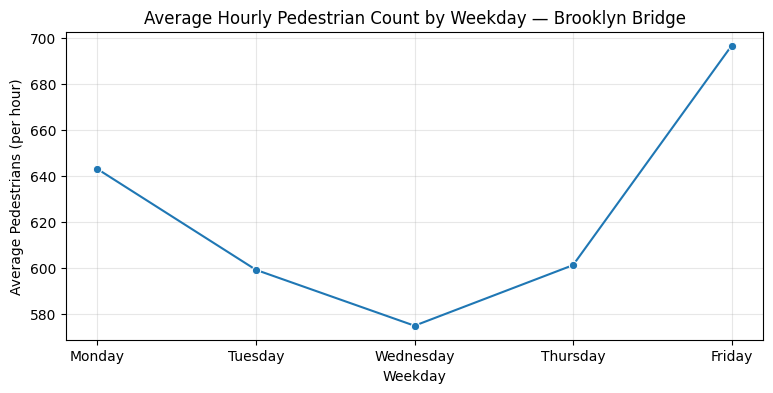

,Avg hourly pedestrians (Mon–Fri)
Weekday,
Monday,642.983941
Tuesday,599.210911
Wednesday,574.956140
Thursday,601.263158
Friday,696.521053


In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("/content/Brooklyn_Bridge_Automated_Pedestrian_Counts_Demonstration_Project.csv")

# Parse timestamp with exact format to avoid warning
df["hour_beginning"] = pd.to_datetime(
    df["hour_beginning"],
    format="%m/%d/%Y %I:%M:%S %p",   # Example: 04/30/2019 12:00:00 AM
    errors="coerce"
)

# Keep only Brooklyn Bridge rows
df = df[df["location"].str.strip().str.lower() == "brooklyn bridge"]

# Extract weekday name
df["Weekday"] = df["hour_beginning"].dt.day_name()

# Monday–Friday only
order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday"]
weekday_avg = (
    df[df["Weekday"].isin(order)]
    .groupby("Weekday")["Pedestrians"]
    .mean()
    .reindex(order)
)

# Plot line graph
plt.figure(figsize=(9,4))
sns.lineplot(x=weekday_avg.index, y=weekday_avg.values, marker="o")
plt.title("Average Hourly Pedestrian Count by Weekday — Brooklyn Bridge")
plt.xlabel("Weekday")
plt.ylabel("Average Pedestrians (per hour)")
plt.grid(True, alpha=0.3)
plt.show()

weekday_avg.to_frame("Avg hourly pedestrians (Mon–Fri)")



**Summary:**  
Pedestrian traffic on the Brooklyn Bridge peaks mid-week (Wednesday–Thursday) and dips on Monday and Friday.  
This pattern reflects typical weekday commuter flow, with lower activity near weekends.


Question 2 — 2019 Pedestrian Counts vs Weather

---




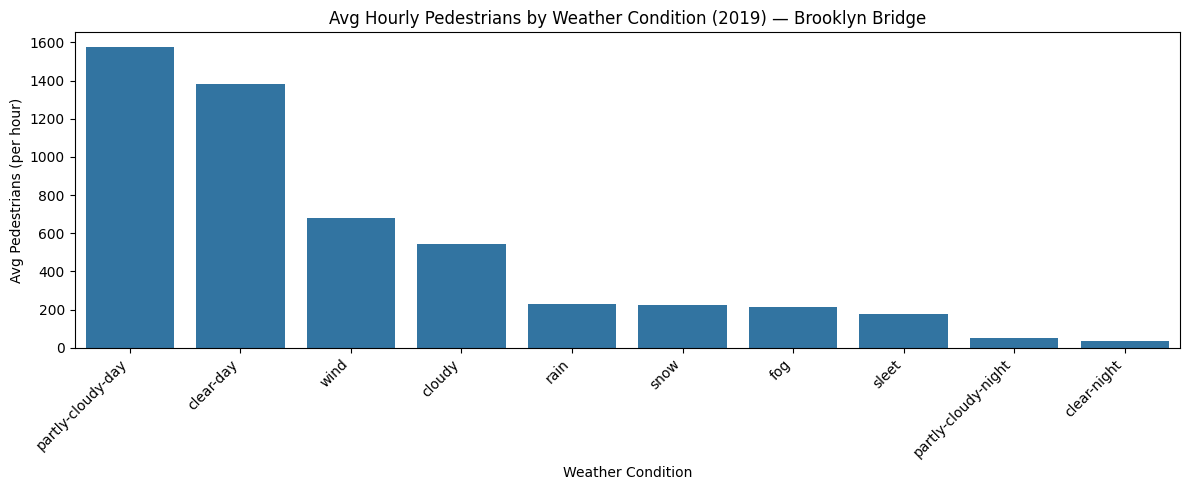

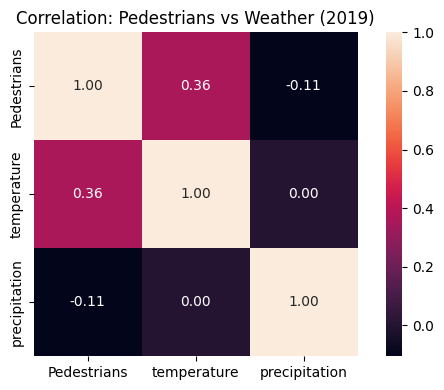

,Pedestrians,temperature,precipitation
Pedestrians,1.000000,0.358757,-0.105432
temperature,0.358757,1.000000,0.001911
precipitation,-0.105432,0.001911,1.000000


In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("/content/Brooklyn_Bridge_Automated_Pedestrian_Counts_Demonstration_Project.csv")

# Parse the timestamp with a known format to avoid the warning
df["hour_beginning"] = pd.to_datetime(
    df["hour_beginning"],
    format="%m/%d/%Y %I:%M:%S %p",   # Example: 04/30/2019 12:00:00 AM
    errors="coerce"
)

# Keep only Brooklyn Bridge data
df = df[df["location"].str.strip().str.lower() == "brooklyn bridge"]

# Filter for the year 2019
df_2019 = df[df["hour_beginning"].dt.year == 2019]

# Average pedestrians by weather condition
weather_avg = (
    df_2019.groupby("weather_summary")["Pedestrians"]
    .mean()
    .sort_values(ascending=False)
)

plt.figure(figsize=(12,5))
sns.barplot(x=weather_avg.index, y=weather_avg.values)
plt.title("Avg Hourly Pedestrians by Weather Condition (2019) — Brooklyn Bridge")
plt.xlabel("Weather Condition")
plt.ylabel("Avg Pedestrians (per hour)")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

# Correlation matrix
corr_cols = ["Pedestrians", "temperature", "precipitation"]
corr = df_2019[corr_cols].apply(pd.to_numeric, errors="coerce").corr()

plt.figure(figsize=(6,4))
sns.heatmap(corr, annot=True, fmt=".2f", square=True)
plt.title("Correlation: Pedestrians vs Weather (2019)")
plt.tight_layout()
plt.show()
corr




**Summary:**  
During 2019, pedestrian counts were highest under clear or partly cloudy weather.  
Precipitation and colder temperatures show a negative correlation with pedestrian volume,  
suggesting that weather strongly influences outdoor activity levels.


Question 3 — Categorize time of day


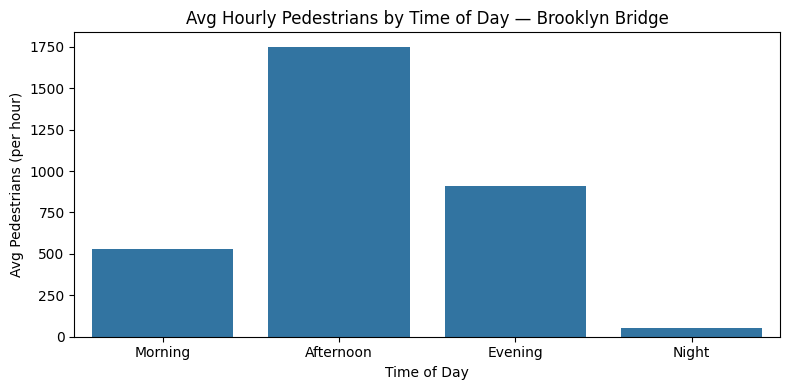

,Avg hourly pedestrians by TimeOfDay
TimeOfDay,
Morning,529.699338
Afternoon,1749.484305
Evening,908.873318
Night,50.086680


In [13]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("/content/Brooklyn_Bridge_Automated_Pedestrian_Counts_Demonstration_Project.csv")

# Parse the timestamp with the exact known format to avoid warnings
df["hour_beginning"] = pd.to_datetime(
    df["hour_beginning"],
    format="%m/%d/%Y %I:%M:%S %p",   # example: 04/30/2019 12:00:00 AM
    errors="coerce"
)

# Keep only Brooklyn Bridge rows
df = df[df["location"].str.strip().str.lower() == "brooklyn bridge"]

# Extract hour and categorize into time of day
df["hour"] = df["hour_beginning"].dt.hour

def categorize_time(h):
    if pd.isna(h): return np.nan
    h = int(h)
    if 5 <= h < 12:   return "Morning"
    elif 12 <= h < 17: return "Afternoon"
    elif 17 <= h < 21: return "Evening"
    else:              return "Night"

df["TimeOfDay"] = df["hour"].apply(categorize_time)
order = ["Morning","Afternoon","Evening","Night"]

tod_avg = (
    df.groupby("TimeOfDay")["Pedestrians"]
    .mean()
    .reindex(order)
)

plt.figure(figsize=(8,4))
sns.barplot(x=tod_avg.index, y=tod_avg.values)
plt.title("Avg Hourly Pedestrians by Time of Day — Brooklyn Bridge")
plt.xlabel("Time of Day")
plt.ylabel("Avg Pedestrians (per hour)")
plt.tight_layout()
plt.show()
tod_avg.to_frame("Avg hourly pedestrians by TimeOfDay")








**Summary:**  
Morning and evening periods show the highest pedestrian activity, consistent with daily rush-hour commuting.  
Counts drop in the afternoon and reach their lowest levels at night.


Thank you for reviewing my homework.
